# Funnel Analysis

**Goal**

The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that lead to conversion is called 'funnel'.

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.

**Challenge Description**

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:
* The first page is the **home page**. When you come to the site for the first time, you can only land on the home page as a first page.
* From the home page, the user can perform a search and land on the **search page**. 
* From the search page, if the user clicks on a product, she will get to the **payment page**, where she is asked to provide payment information in order to buy that product.
* If she does decide to buy, she ends up on the confirmation page

The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Specifically, she is interested in :
* **A full picture of funnel conversion rate** for both desktop and mobile
* Some insights on **what the product team should focus on** in order to improve conversion rate as well as anything you might discover that could help improve

**Data**

`User_table`
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables
* date : the date when the user firstly landed on the site
* device : user device. Can be mobile or desktop
* sex : male/female

`home_page_table`
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables
* page : it is always home_page.

`search_page_tabl`
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables
* page : it is always search_page

`payment_page_table`
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables
* page : it is always payment_page

`payment_confirmation_table`
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables
* page : it is always payment_confirmation_page

# 1. Load Libraries and dataset

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.warnings.filterwarnings('ignore')

In [374]:
ls

Code.ipynb                      payment_page_table.csv
home_page_table.csv             search_page_table.csv
payment_confirmation_table.csv  user_table.csv


In [375]:
home_page_table = pd.read_csv('home_page_table.csv')
search_page_table = pd.read_csv('search_page_table.csv')
payment_page = pd.read_csv('payment_page_table.csv')
payment_confirmation_table = pd.read_csv('payment_confirmation_table.csv')
user_table = pd.read_csv('user_table.csv')

lst = [
    user_table, home_page_table, search_page_table, payment_page,
    payment_confirmation_table
]

#name each table in the list
tables = [
    'user_table', 'home_page_table', 'search_page_table', 'payment_page',
    'payment_confirmation_table'
]
for table, name in zip(lst, tables):
    table.name = name

**Funnel**

home_page --> search_page --> payment_page --> payment_confirmation_table

# 2. Data Cleaning

In [376]:
for tb in lst:
    print(tb.sample(5))

       user_id        date   device     sex
68112   952705  2015-04-25  Desktop  Female
12176   729511  2015-02-18  Desktop    Male
26436   936975  2015-04-05  Desktop    Male
88644   195611  2015-03-03  Desktop  Female
62905    75917  2015-04-14  Desktop  Female
       user_id       page
71615   349243  home_page
5476    474586  home_page
48459   549152  home_page
77183   247031  home_page
418     582207  home_page
       user_id         page
36471   526093  search_page
34520   458500  search_page
32388    49514  search_page
36364   764934  search_page
39451   949924  search_page
      user_id          page
5614   791986  payment_page
1227   448011  payment_page
845    638892  payment_page
1802    97770  payment_page
4426   384543  payment_page
     user_id                       page
222   504055  payment_confirmation_page
122   674513  payment_confirmation_page
117   473150  payment_confirmation_page
219    18898  payment_confirmation_page
426   567797  payment_confirmation_page


In [377]:
#lenth of each table
for tb in lst:
    print(f'{tb.name:<30} --- {len(tb):>4}')

user_table                     --- 90400
home_page_table                --- 90400
search_page_table              --- 45200
payment_page                   --- 6030
payment_confirmation_table     ---  452


452/90400 = **0.005** of all the users converted to our customers eventually.\
So, our conversion rate is around 0.5%

**Now we need to join these tables together**

In [378]:
df = user_table.merge(home_page_table, left_on='user_id', right_on='user_id', how='left', suffixes=('', '_home'))
df = df.merge(search_page_table, left_on='user_id', right_on='user_id', how='left', suffixes=('', '_search'))
df = df.merge(payment_page, left_on='user_id', right_on='user_id', how='left', suffixes=('', '_payment'))
df = df.merge(payment_confirmation_table, left_on='user_id', right_on='user_id', how='left', suffixes=('', '_confirmation'))


The suffixes parameter is used in the pd.merge() function to specify a string to append to the names of columns that have the same name in both dataframes being merged. It is a tuple of strings, with the first string being applied to the names of columns from the left dataframe, and the second string being applied to the names of columns from the right dataframe.

In [379]:
df.sample(5)

,user_id,date,device,sex,page,page_search,page_payment,page_confirmation
27429,795651,2015-02-06,Desktop,Male,home_page,search_page,NaN,NaN
13295,535124,2015-02-13,Desktop,Male,home_page,NaN,NaN,NaN
16226,119707,2015-01-31,Desktop,Female,home_page,NaN,NaN,NaN
71309,729981,2015-01-26,Mobile,Male,home_page,search_page,NaN,NaN
23838,426773,2015-02-17,Desktop,Male,home_page,search_page,NaN,NaN


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page               90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [381]:
df.isnull().sum()

user_id                  0
date                     0
device                   0
sex                      0
page                     0
page_search          45200
page_payment         84370
page_confirmation    89948
dtype: int64

**Convert Null into 0 and page name to 1**

In [382]:
df['page'] = 1
df['page_search'] = np.where(df['page_search'].isnull(),0,1)
df['page_payment'] = np.where(df['page_payment'].isnull(),0,1)
df['page_confirmation'] = np.where(df['page_confirmation'].isnull(),0,1)

In [383]:
df.head()

,user_id,date,device,sex,page,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


# 3.Data Visualization

**How many users are there by device type?**

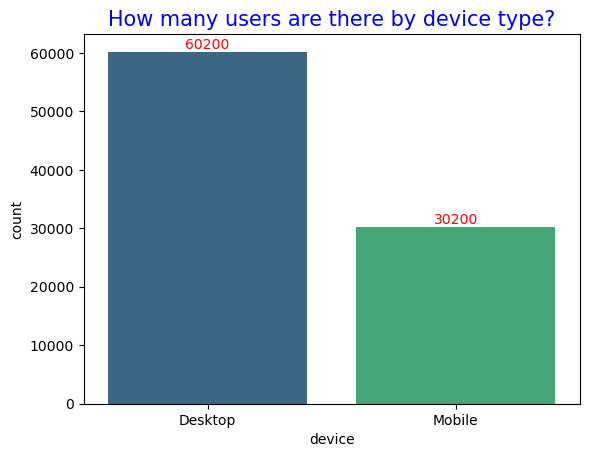

In [384]:
ax = sns.countplot(data=df, x='device',palette='viridis')
ax.set_title('How many users are there by device type?',size=15,color='blue')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, ha='center', va='bottom',color='red')

**What is the distribution of users by sex?**

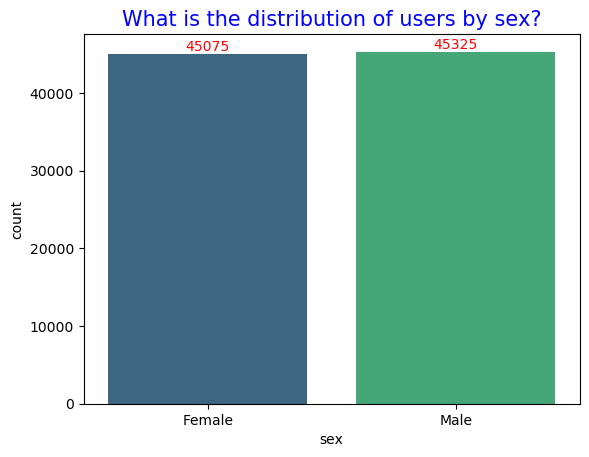

In [385]:
ax = sns.countplot(data=df, x='sex',palette='viridis')
ax.set_title('What is the distribution of users by sex?',size=15,color='blue')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, ha='center', va='bottom',color='red')

**How many users visited each page?**

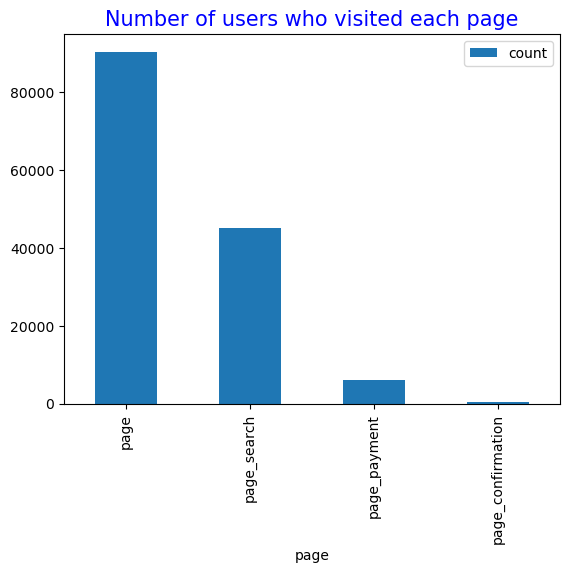

In [386]:
# Calculate the number of users who visited each page
page_counts = df[['page', 'page_search', 'page_payment', 'page_confirmation']].sum().reset_index()
page_counts.columns = ['page', 'count']

# Create the bar chart
page_counts.plot.bar(x='page', y='count', stacked=True)
plt.title('Number of users who visited each page',size=15,color='blue')
plt.show()

**Insights**:
* The page views decreased from page to page_confirmation. It could mean that a proportion of users are dropping off or abandoning the process before completing the final page (page_confirmation). This could be due to a variety of reasons, such as difficulty in completing the process, lack of interest in the product or service, or issues with the website or app. It would be helpful to further analyze the data to understand why users are dropping off at each stage of the process and identify potential ways to improve the user experience and increase the number of successful conversions. For example, we could look at the page views by device and sex to see if there are any trends or patterns that might explain the drop-off. We could also gather feedback from users to understand their motivations and frustrations during the process. By identifying the root causes of the drop-off, we can implement strategies to improve the conversion rate and increase the number of successful transactions.

**page views over time**

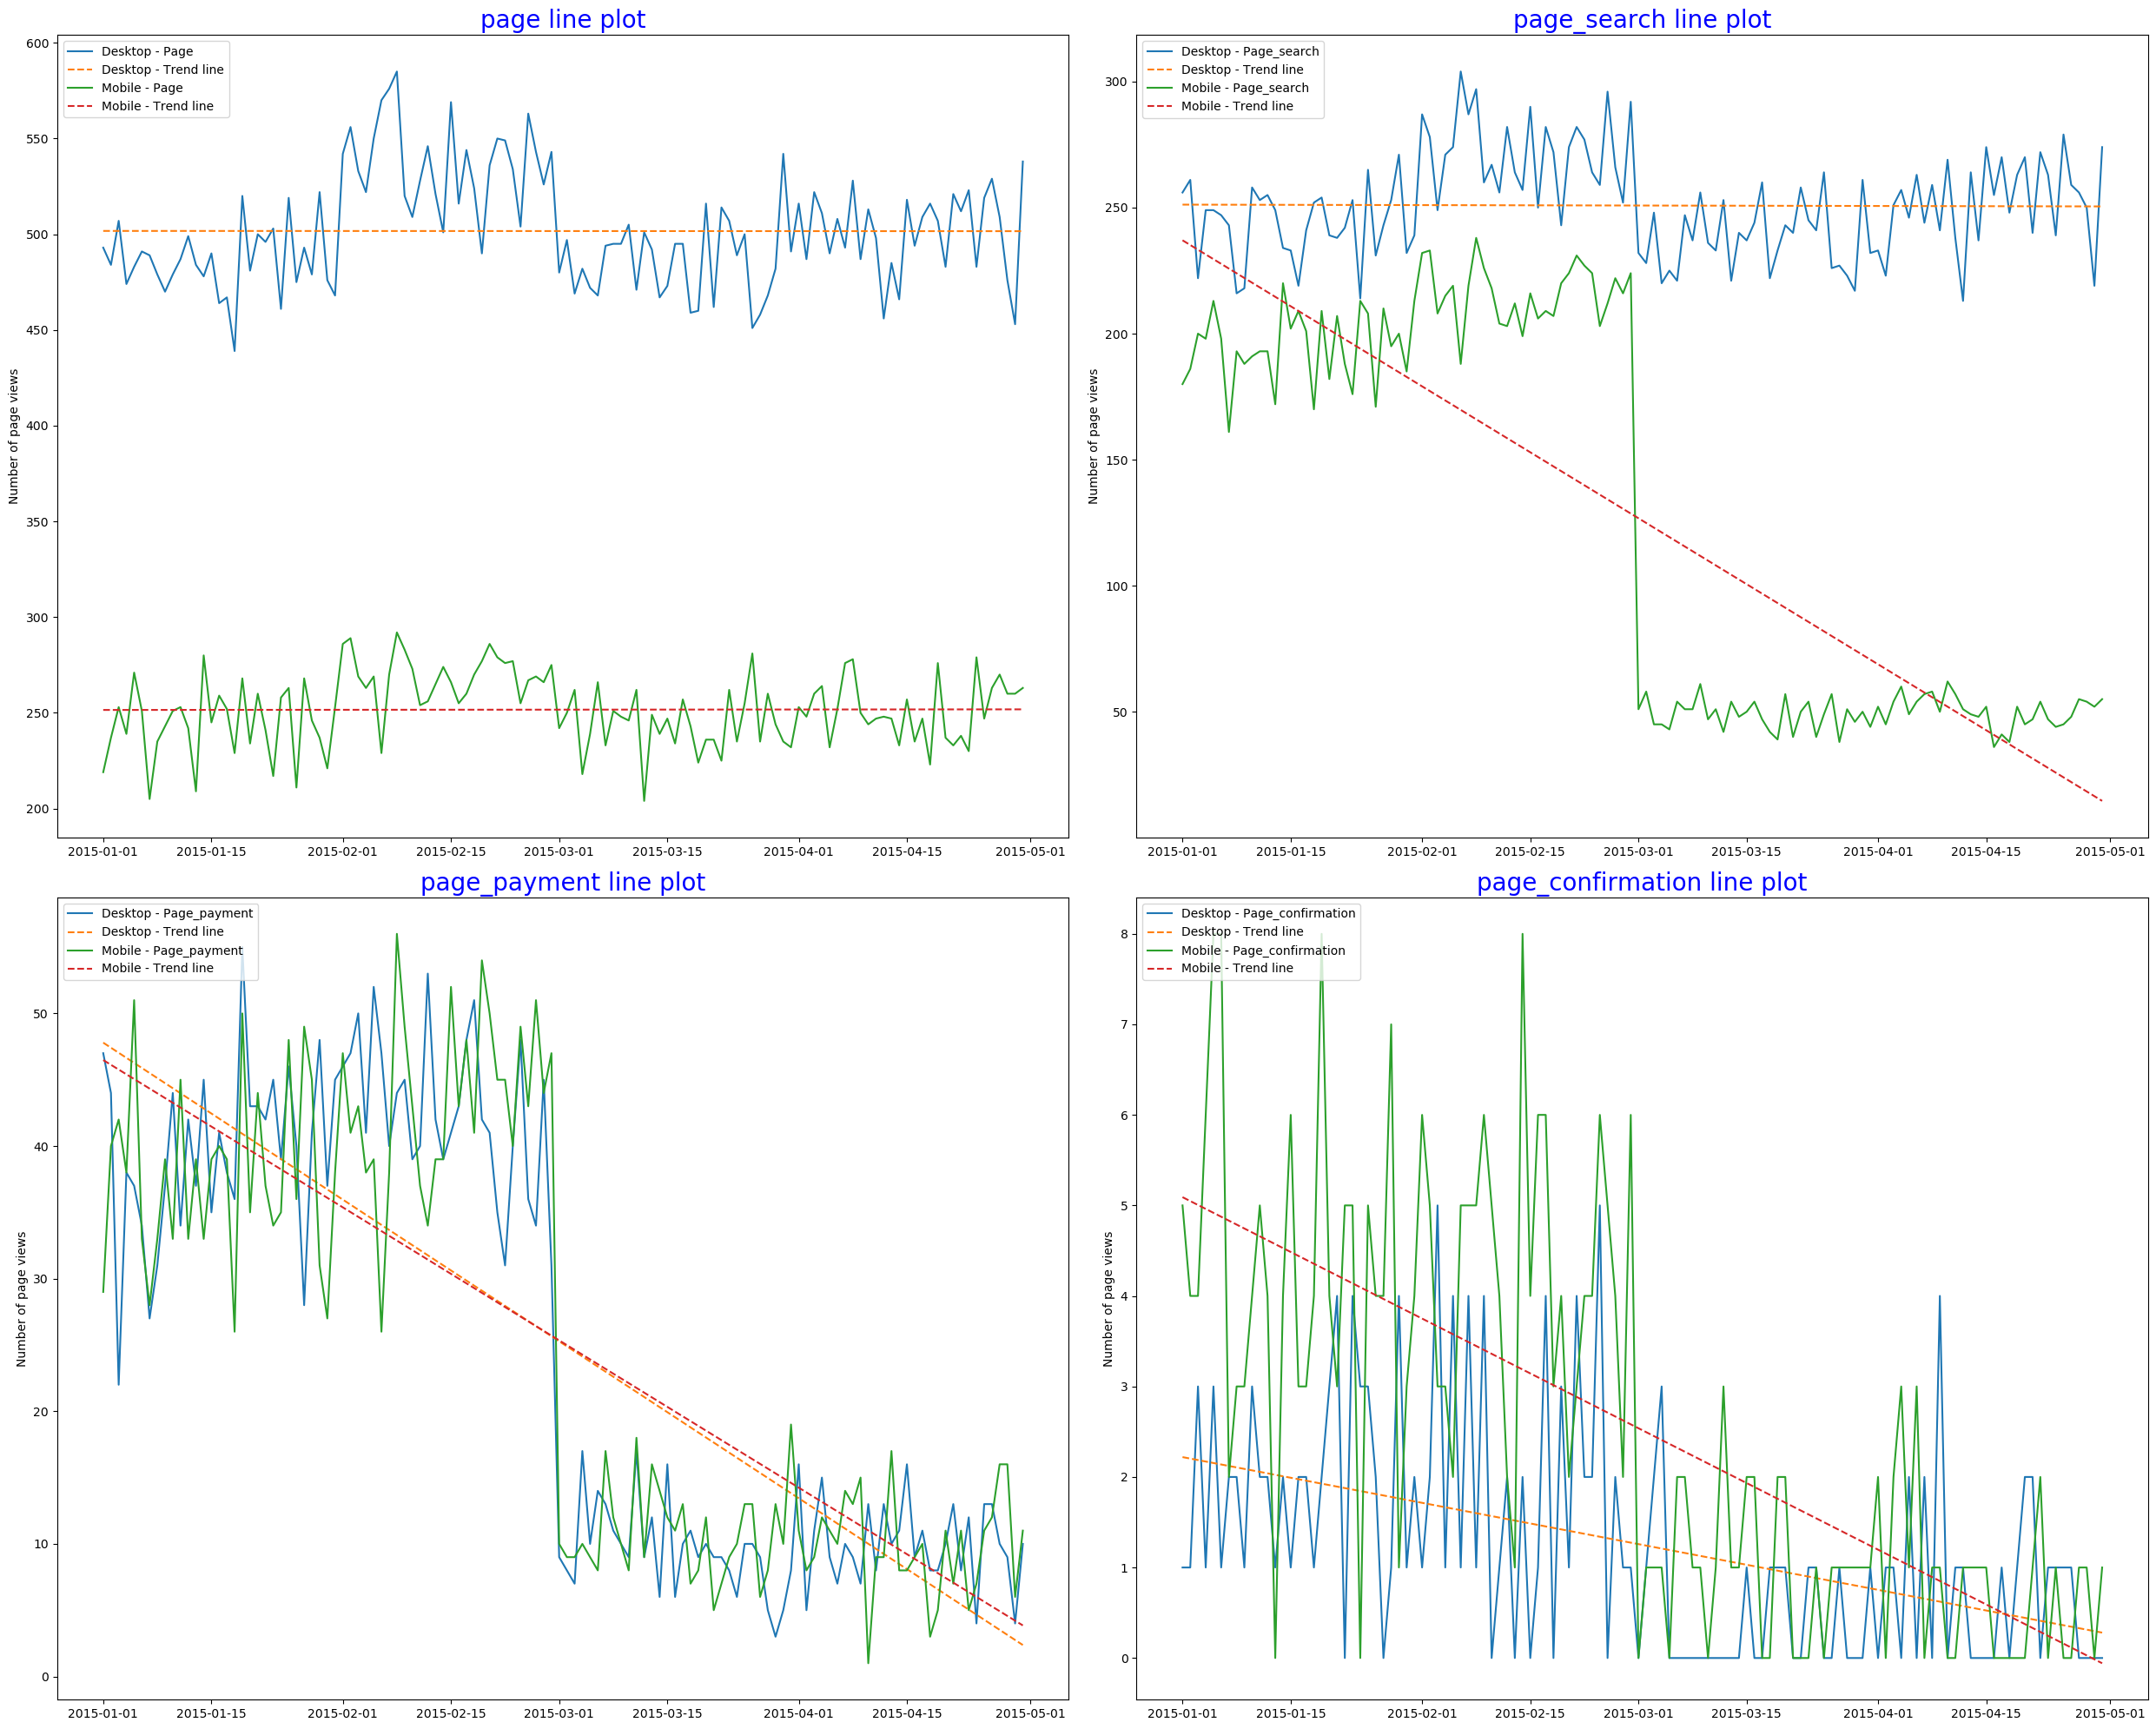

In [387]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Set up subplots
fig, axs = plt.subplots(2, 2,figsize=(25,20))

# List of pages
pages = ["page", "page_search", "page_payment", "page_confirmation"]

# Iterate through pages
for i, page in enumerate(pages):
    # Group data by device and date and aggregate page views
    grouped = df.groupby(["device", "date"])[page].sum().reset_index()
    
    # Group by device and plot lines
    for j, device in enumerate(["Desktop", "Mobile"]):
        device_data = grouped[grouped["device"] == device]
        axs[i//2, i%2].plot(device_data["date"], device_data[page], label=f'{device} - {page.capitalize()}')
        
        # Fit and plot trend line
        z = np.polyfit(device_data.index, device_data[page], 1)
        p = np.poly1d(z)
        axs[i//2, i%2].plot(device_data["date"], p(device_data.index), "--", label=f"{device} - Trend line")
    
    # Add labels
    axs[i//2, i%2].set_xlabel(None)
    axs[i//2, i%2].set_ylabel("Number of page views")
    axs[i//2, i%2].set_title(f'{page} line plot',size=20,color='blue')
    
    # Add legend
    axs[i//2, i%2].legend(loc="upper left")

plt.tight_layout()


**Insights**:
* From the plotted data, it appears that there is a peak in the number of page visits during the period from around 2015-02-01 to 2015-03-01. This is indicated by the highest point on the line plot, which corresponds to this time range. The exact cause of this peak in page visits is not clear from the given data, but it could be due to a variety of factors such as changes in marketing efforts, changes in website content or layout, or external events that drive traffic to the website.
* Upon examining the data, it is apparent that the number of page views for both mobile and desktop devices follows similar patterns over time. However, there is a noticeable decrease in the number of page views for mobile devices compared to desktop devices. This suggests that there may be some factors that are leading to a lower number of page views for mobile devices. It is not clear from this information alone what those factors may be or what action the business could take to address this difference in page views. To gain a deeper understanding of this trend and identify potential areas for improvement, it may be helpful to gather additional data and conduct further analysis.

**Is there a relationship between device type and page visited?**

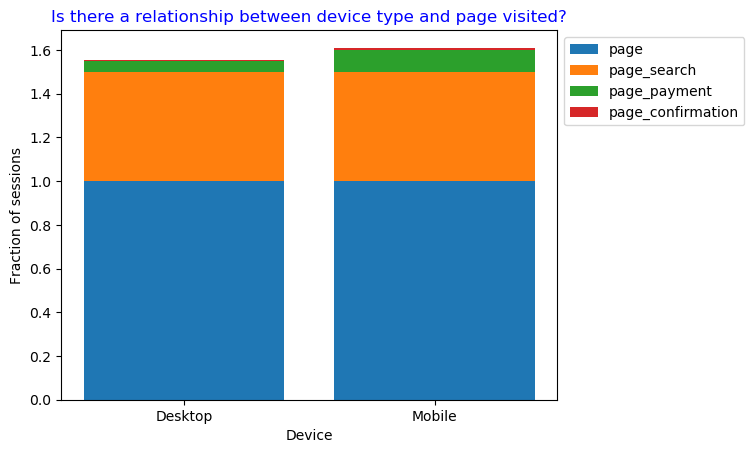

In [388]:
# Data
page = [1.0, 1.0]
page_search = [0.5, 0.5]
page_payment = [0.05, 0.1]
page_confirmation = [0.002492, 0.01]

# Plot bars
plt.bar(["Desktop", "Mobile"], page, label="page")
plt.bar(["Desktop", "Mobile"], page_search, bottom=page, label="page_search")
plt.bar(["Desktop", "Mobile"], page_payment, bottom=[page[i] + page_search[i] for i in range(2)], label="page_payment")
plt.bar(["Desktop", "Mobile"], page_confirmation, bottom=[page[i] + page_search[i] + page_payment[i] for i in range(2)], label="page_confirmation")

# Add legend and labels
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("Device")
plt.ylabel("Fraction of sessions")
plt.title('Is there a relationship between device type and page visited?',color='blue')

# Show plot
plt.show()


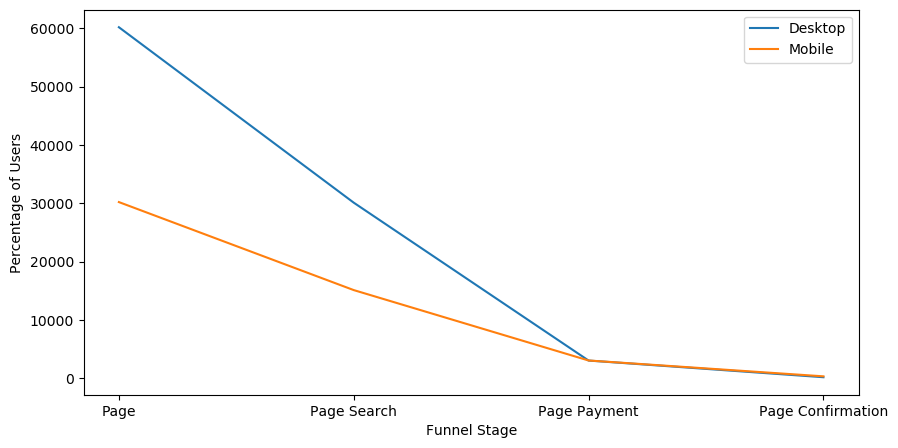

In [389]:
# Group the data by device
device_groups = df.groupby('device')

# Calculate the percentage of users at each stage of the funnel for each device
funnel_data = []
for device, group in device_groups:
    page_count = group['page'].sum()
    search_count = group['page_search'].sum()
    payment_count = group['page_payment'].sum()
    confirmation_count = group['page_confirmation'].sum()
    funnel_data.append([page_count, search_count, payment_count, confirmation_count])

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(funnel_data[0], label='Desktop')
plt.plot(funnel_data[1], label='Mobile')
plt.legend()
plt.xlabel('Funnel Stage')
plt.ylabel('Percentage of Users')
plt.xticks([0, 1, 2, 3], ['Page', 'Page Search', 'Page Payment', 'Page Confirmation'])
plt.show()

**Insights**:
* The conversion rates for both desktop and mobile devices decrease and eventually converge at the "page_payment" stage. This suggests that the percentage of users who progress from the "page_search" stage to the "page_payment" stage is similar for both desktop and mobile users. It is not clear from this information alone what factors may be contributing to the convergence of the conversion rates at the "page_payment" stage or what action the business could take as a result. To gain a deeper understanding of this trend and identify potential areas for improvement, it may be helpful to gather additional data and conduct further analysis.

**Heatmap of page_confirmation by device and sex**

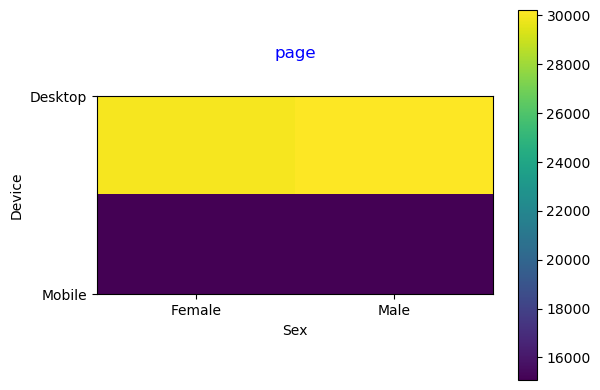

In [390]:
def plot_heatmap(df, var):
    # Group data by device and sex
    grouped = df.groupby(["device", "sex"])[var].sum().reset_index()

    # Pivot data to create a matrix
    matrix = grouped.pivot("device", "sex", var)

    # Plot heatmap
    plt.imshow(matrix, cmap="viridis")

    # Add labels and ticks
    plt.title(f'{var}',y=1.15,color='blue')
    plt.xlabel("Sex")
    plt.ylabel("Device")
    plt.xticks(range(len(matrix.columns)), matrix.columns)
    plt.yticks(range(len(matrix.index)), matrix.index)

    # Add color bar
    plt.colorbar()

plot_heatmap(df, "page")

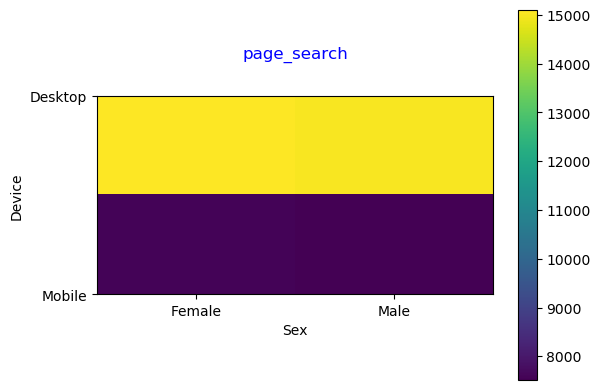

In [391]:
plot_heatmap(df, "page_search")

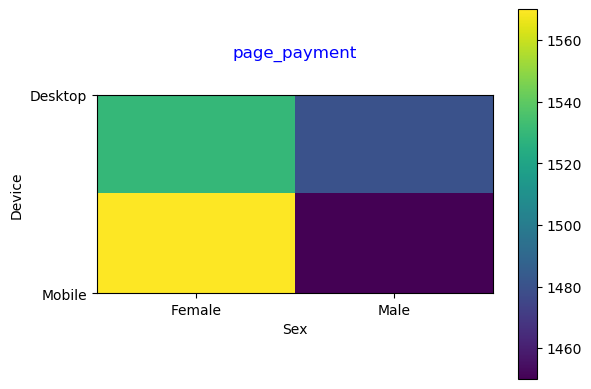

In [392]:
plot_heatmap(df, "page_payment")

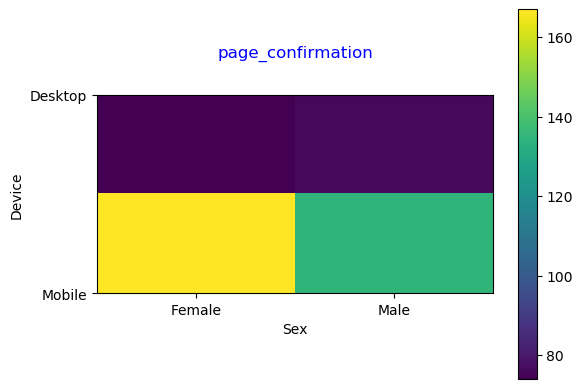

In [393]:
plot_heatmap(df, "page_confirmation")

**Insights**:
* It appears that prior to reaching the page called "page_payment," there is no significant difference in conversion rates between males and females. However, after reaching the "page_search" page, there is a slightly higher percentage of females who go on to visit the "page_payment" page compared to males, particularly among users accessing the site through mobile devices.